In [1]:
from fastai.vision.all import *
from ultralytics import YOLO

In [7]:
golf_files = get_files('../../../custom_models/Golf-club-path-analysis-1/')
golf_files[-3:]

(#3) [Path('../../../custom_models/Golf-club-path-analysis-1/test/images/youtube-6_jpg.rf.88a64b8ab46009dcf521c58c9568eb08.jpg'),Path('../../../custom_models/Golf-club-path-analysis-1/test/images/youtube-0_jpg.rf.e9e572e33d76c18bc348c43f81e11be4.jpg'),Path('../../../custom_models/Golf-club-path-analysis-1/test/images/youtube-7_jpg.rf.de732739ad329496ad2eddc3345acdcc.jpg')]

In [39]:
img_files = get_files('../../../custom_models/Golf-club-path-analysis-1/train/images/')
img_files[-1]

Path('../../../custom_models/Golf-club-path-analysis-1/train/images/youtube-4_jpg.rf.2ae372a0768a1b2350ad4474427fd261.jpg')

In [45]:
get_files('../../../custom_models/Golf-club-path-analysis-1/train/labels/')[0]

Path('../../../custom_models/Golf-club-path-analysis-1/train/labels/youtube-1_jpg.rf.6bd646e819aceb367c867a28c25159cc.txt')

In [51]:
parent_lbl_path = '../../../custom_models/Golf-club-path-analysis-1/train/labels/'
lbl_paths = [f"{parent_lbl_path}{'.'.join(x.name.split('.')[:-1])}.txt" for x in img_files]

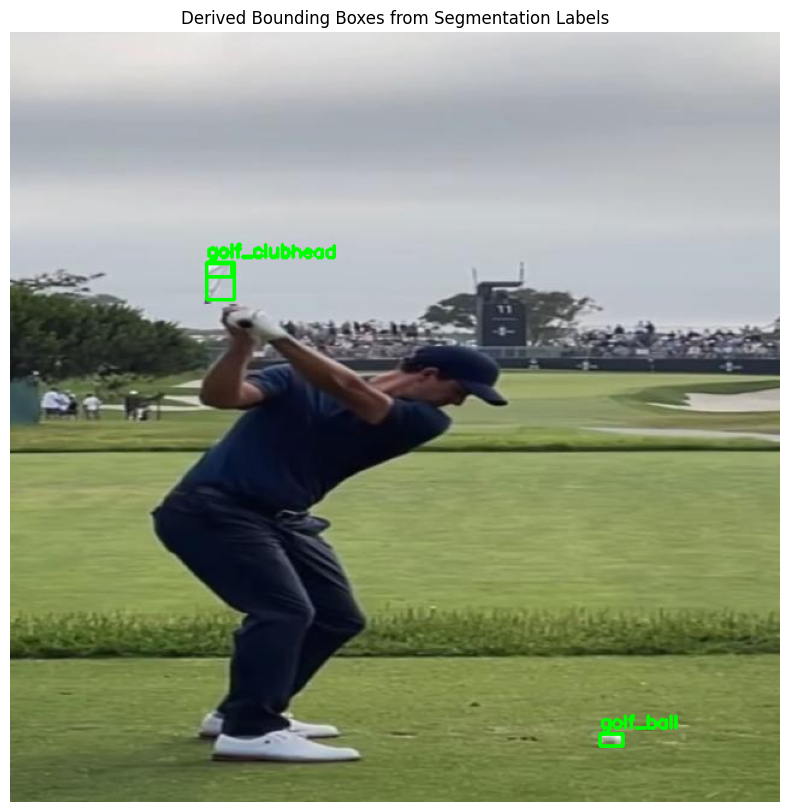

In [76]:
plot_yolo_segmentation_as_bbox(img_files[140], 
                               lbl_paths[140], 
                               class_names=['golf_ball', 'golf_club', 'golf_clubhead'])

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_yolo_segmentation_as_bbox(image_path, label_path, class_names=None):
    """
    Plots bounding boxes derived from YOLO segmentation labels.
    """
    # 1. Load the image to get dimensions
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return
    
    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # 2. Read the label file
    with open(label_path, 'r') as f:
        lines = f.readlines()

    # 3. Parse each line
    for line in lines:
        parts = list(map(float, line.strip().split()))
        class_id = int(parts[0])
        coords = parts[1:]
        
        # Reshape into (N, 2) array of (x, y) pairs
        points_norm = np.array(coords).reshape(-1, 2)
        
        # Denormalize: Convert from 0-1 range to pixel coordinates
        # x_pixel = x_norm * width, y_pixel = y_norm * height
        points_pixel = points_norm * np.array([w, h])
        points_pixel = points_pixel.astype(int)
        
        # 4. Calculate Bounding Box (min/max x and y)
        x_min = np.min(points_pixel[:, 0])
        x_max = np.max(points_pixel[:, 0])
        y_min = np.min(points_pixel[:, 1])
        y_max = np.max(points_pixel[:, 1])
        
        # Draw the Bounding Box
        # Color: Green (0, 255, 0), Thickness: 2
        cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        
        # Optional: Draw the Polygon itself (to see the actual segmentation)
        # cv2.polylines(img_rgb, [points_pixel], isClosed=True, color=(255, 0, 0), thickness=2)

        # Add Label Text
        label_text = f"Class {class_id}"
        if class_names and class_id < len(class_names):
            label_text = class_names[class_id]
            
        cv2.putText(img_rgb, label_text, (x_min, y_min - 5), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # 5. Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Derived Bounding Boxes from Segmentation Labels")
    plt.show()